# Explore data set

In [1]:
import pandas as pd
import numpy as np

coworking = pd.read_csv("Startup_Incubators_Accelerators_Startups_and_Coworking_places_in_Finland_Germany_and_France.csv")
print(coworking.head())

            Name  Country    Year    Revenue  Profit   Day pass  Week pass  \
0  UMA Workspace  Finland     NaN        NaN      NaN      20.0      199.0   
1    Teho-osasto  Finland  2017.0    18000.0 -13000.0      25.0       60.0   
2        Y_North  Finland  2013.0  1327000.0 -68000.0       NaN        NaN   
3  Village Works  Finland  2008.0  1200000.0 -34000.0      20.0        NaN   
4    NJETWORKING  Finland  2011.0    83000.0  -5000.0      15.0        NaN   

   Month pass  
0         NaN  
1       199.0  
2       248.0  
3       150.0  
4        99.0  


In [2]:
print(coworking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        73 non-null     object 
 1   Country     73 non-null     object 
 2   Year        18 non-null     float64
 3   Revenue     16 non-null     float64
 4   Profit      16 non-null     float64
 5   Day pass    46 non-null     float64
 6   Week pass   15 non-null     float64
 7   Month pass  62 non-null     float64
dtypes: float64(6), object(2)
memory usage: 4.7+ KB
None


The data set contains 73 entries, with a lot of Null values to be cleaned. There are 8 columns containing these information:
-	Country: The country where coworking spaces locate
-	Year: Established year of coworking space
-	Revenue: Total turnover of coworking space in the most recent year (2018/2019/2020)
-	Profit: The profit the coworking space in the most recent year (2018/2019/2020)
-	Day pass: Price for a day ticket for 1 person
-	Week pass: Price for a week ticket for 1 person
-	Year pass: Lowest price for a monthly ticket for 1 person

# Clean data

## Reshape the data frame

In [3]:
print(coworking.columns)

Index(['Name', 'Country', 'Year', 'Revenue', 'Profit ', 'Day pass',
       'Week pass', 'Month pass'],
      dtype='object')


In [4]:
coworking = pd.melt(frame=coworking, 
                    id_vars =["Name", "Country", "Year"],
                    value_vars=["Day pass", "Week pass", "Month pass","Revenue", "Profit "],
                    value_name="Price",
                    var_name="Category")
print(coworking.head())

            Name  Country    Year  Category  Price
0  UMA Workspace  Finland     NaN  Day pass   20.0
1    Teho-osasto  Finland  2017.0  Day pass   25.0
2        Y_North  Finland  2013.0  Day pass    NaN
3  Village Works  Finland  2008.0  Day pass   20.0
4    NJETWORKING  Finland  2011.0  Day pass   15.0


## Deal with duplicates

Since I was the who put all the data into csv file, I have already eliminated and tried not to put duplicates. However, just to be certain, I will check again once more. The result, as expected shows no duplicates.

In [5]:
duplicates = coworking.duplicated()
print(duplicates.value_counts())

False    365
dtype: int64


## Deal with Null values

In this scenerio, since column "Year", "Profit", "Revenue" only applied to Finnnish coworking spaces, I will ignore these 3 columns for French and German coworking spaces for further analysis. First, let's deal with these 3 columns for Finnish coworking spaces.

In [6]:
# split dataframe to each country category
Finnish = coworking[coworking.Country == "Finland"]
French = coworking[coworking.Country == "France"]
German = coworking[coworking.Country == "Germany "]

# start up with Year, Revenue, Profit for Finnish dataframe
print(Finnish.Year.values)
print(Finnish.Year.isnull().sum())

[  nan 2017. 2013. 2008. 2011. 2018.   nan 2019. 2015. 2012. 2011. 2003.
 1993. 2016. 2010. 1996.   nan   nan 1995. 2015.   nan 2017. 2013. 2008.
 2011. 2018.   nan 2019. 2015. 2012. 2011. 2003. 1993. 2016. 2010. 1996.
   nan   nan 1995. 2015.   nan 2017. 2013. 2008. 2011. 2018.   nan 2019.
 2015. 2012. 2011. 2003. 1993. 2016. 2010. 1996.   nan   nan 1995. 2015.
   nan 2017. 2013. 2008. 2011. 2018.   nan 2019. 2015. 2012. 2011. 2003.
 1993. 2016. 2010. 1996.   nan   nan 1995. 2015.   nan 2017. 2013. 2008.
 2011. 2018.   nan 2019. 2015. 2012. 2011. 2003. 1993. 2016. 2010. 1996.
   nan   nan 1995. 2015.]
20


In [7]:
print(len(Finnish.Price))
print(Finnish.Price.isnull().sum())

100
36


In [8]:
print(Finnish[(Finnish.Price.isnull()) & (Finnish.Year.isnull())])

                    Name  Country  Year    Category  Price
79   Coworking Myyr York  Finland   NaN   Week pass    NaN
89              Luovasti  Finland   NaN   Week pass    NaN
90        HUB Kukkiatalo  Finland   NaN   Week pass    NaN
146        UMA Workspace  Finland   NaN  Month pass    NaN
219        UMA Workspace  Finland   NaN     Revenue    NaN
225  Coworking Myyr York  Finland   NaN     Revenue    NaN
235             Luovasti  Finland   NaN     Revenue    NaN
236       HUB Kukkiatalo  Finland   NaN     Revenue    NaN
292        UMA Workspace  Finland   NaN     Profit     NaN
298  Coworking Myyr York  Finland   NaN     Profit     NaN
308             Luovasti  Finland   NaN     Profit     NaN
309       HUB Kukkiatalo  Finland   NaN     Profit     NaN


In [9]:
Finnish = Finnish.drop([79,89,90,146,219,225,235,236,292,298,308,309])

In [10]:
print(len(Finnish.Price))
print(Finnish.Price.isnull().sum())

88
24


In [11]:
print(Finnish.Year.isnull().sum())

8


There are no 8 null values for Year column (used to be 20) and 24 null values for Price column (used to be 36). I will drop these Year null values, but fill in null values in Price column with mean values for each category: Day pass, Week pass and Month pass. However, for limited time, I will delete all NaN values for the ease of analysis.

In [16]:
Finnish = Finnish.dropna(subset=["Year", "Price"])
print(Finnish)

                       Name  Country    Year    Category       Price
1               Teho-osasto  Finland  2017.0    Day pass        25.0
3             Village Works  Finland  2008.0    Day pass        20.0
4               NJETWORKING  Finland  2011.0    Day pass        15.0
5           Wonderland Work  Finland  2018.0    Day pass        15.0
10   MOW Mothership of Work  Finland  2011.0    Day pass        25.0
11           CoSpace Porvoo  Finland  2003.0    Day pass        20.0
13                  DOOROOM  Finland  2016.0    Day pass        25.0
15          Mesta Coworking  Finland  1996.0    Day pass        16.0
74              Teho-osasto  Finland  2017.0   Week pass        60.0
84           CoSpace Porvoo  Finland  2003.0   Week pass        96.0
88          Mesta Coworking  Finland  1996.0   Week pass        65.0
147             Teho-osasto  Finland  2017.0  Month pass       199.0
148                 Y_North  Finland  2013.0  Month pass       248.0
149           Village Works  Finla

In [15]:
print(Finnish.Price.isnull().sum())

0


The Finnish dataframe is now available for analysis. The same approach will be then performed on French and German dataframes.

In [20]:
day_mean = Finnish[(Finnish.Category == "Day pass") & (Finnish.Price.isnull()==False)].Price.mean()
month_mean =Finnish[(Finnish.Category == "Month pass") & (Finnish.Price.isnull()==False)].Price.mean()
week_mean = Finnish[(Finnish.Category == "Week pass") & (Finnish.Price.isnull()==False)].Price.mean()

In [27]:
German = German.dropna(subset=["Price"])
G_day_mean = German[(German.Category == "Day pass") & (German.Price.isnull()==False)].Price.mean()
G_week_mean = German[(German.Category == "Week pass") & (German.Price.isnull()==False)].Price.mean()
G_month_mean = German[(German.Category == "Month pass") & (German.Price.isnull()==False)].Price.mean()

In [26]:
French = French.dropna(subset=["Price"])
F_day_mean = French[(French.Category == "Day pass") & (French.Price.isnull()==False)].Price.mean()
F_week_mean = French[(French.Category == "Week pass") & (French.Price.isnull()==False)].Price.mean()
F_month_mean = French[(French.Category == "Month pass") & (French.Price.isnull()==False)].Price.mean()

# Data analysis


## Mean price for a day pass, weekly pass and monthly pass for 1 person in 3 countries

In [28]:
print(day_mean, month_mean, week_mean)

20.125 227.6153846153846 73.66666666666667


In [29]:
print(F_day_mean, F_week_mean, F_month_mean)

24.666666666666668 104.16666666666667 282.7391304347826


In [30]:
print(G_day_mean, G_week_mean, G_month_mean)

19.125 107.6 241.17391304347825


In [33]:
clean_data = pd.concat([Finnish, French, German])
print(clean_data.head())

                      Name  Country    Year  Category  Price
1              Teho-osasto  Finland  2017.0  Day pass   25.0
3            Village Works  Finland  2008.0  Day pass   20.0
4              NJETWORKING  Finland  2011.0  Day pass   15.0
5          Wonderland Work  Finland  2018.0  Day pass   15.0
10  MOW Mothership of Work  Finland  2011.0  Day pass   25.0


In [32]:
mean_df = pd.DataFrame({"Type": ["Day", "Week", "Month"], 
                       "Finland": [day_mean, week_mean, month_mean], 
                       "Germany": [G_day_mean, G_week_mean, G_month_mean],
                       "France": [F_day_mean, F_week_mean, F_month_mean]})
print(mean_df)

    Type     Finland     Germany      France
0    Day   20.125000   19.125000   24.666667
1   Week   73.666667  107.600000  104.166667
2  Month  227.615385  241.173913  282.739130


## Top 10 organizations in terms of cheapest day pass for each countries

In [41]:
Finnish_top_5_day = Finnish[Finnish.Category == "Day pass"].sort_values(by=['Price'])[:5].reset_index()
print(Finnish_top_5_day)

   index             Name  Country    Year  Category  Price
0      4      NJETWORKING  Finland  2011.0  Day pass   15.0
1      5  Wonderland Work  Finland  2018.0  Day pass   15.0
2     15  Mesta Coworking  Finland  1996.0  Day pass   16.0
3      3    Village Works  Finland  2008.0  Day pass   20.0
4     11   CoSpace Porvoo  Finland  2003.0  Day pass   20.0


In [39]:
German_top_10_day = German[German.Category == "Day pass"].sort_values(by=['Price'])[:10].reset_index()
print(German_top_10_day)

   index                           Name   Country  Year  Category  Price
0     33  HeartSpace Coworking & Coffee  Germany    NaN  Day pass    9.0
1     42                       Zammwerk  Germany    NaN  Day pass   12.0
2     30                Impact Hub Ruhr  Germany    NaN  Day pass   15.0
3     34                        THE 9TH  Germany    NaN  Day pass   15.0
4     39                    skalitzer33  Germany    NaN  Day pass   15.0
5     31               Betahaus Hamburg  Germany    NaN  Day pass   17.0
6     37                       b+office  Germany    NaN  Day pass   17.0
7     32                      Weserland  Germany    NaN  Day pass   18.0
8     29                BASE Co-Working  Germany    NaN  Day pass   20.0
9     36                          Werk1  Germany    NaN  Day pass   20.0


In [42]:
French_top_10_day = French[French.Category == "Day pass"].sort_values(by=['Price'])[:10].reset_index()
print(French_top_10_day)

   index                       Name Country  Year  Category  Price
0     59                     Le 400  France   NaN  Day pass    9.0
1     60                     Morpho  France   NaN  Day pass   15.0
2     55          Startup Marseille  France   NaN  Day pass   15.0
3     61               Le Bureau 68  France   NaN  Day pass   18.0
4     66                 Living Lab  France   NaN  Day pass   20.0
5     64               Globe Worker  France   NaN  Day pass   20.0
6     72  WOMA fabrique de quartier  France   NaN  Day pass   20.0
7     71     Le Loft Coworkinrennes  France   NaN  Day pass   24.0
8     49                COSY CORNER  France   NaN  Day pass   24.0
9     57                   HarryCow  France   NaN  Day pass   25.0


## Top 10 in terms of cheapest month pass

In [44]:
Finnish_top_5_month = Finnish[Finnish.Category == "Month pass"].sort_values(by=['Price'])[:5].reset_index()
print(Finnish_top_5_month)


   index             Name  Country    Year    Category  Price
0    150      NJETWORKING  Finland  2011.0  Month pass   99.0
1    159          DOOROOM  Finland  2016.0  Month pass  135.0
2    149    Village Works  Finland  2008.0  Month pass  150.0
3    158       Urban Mill  Finland  1993.0  Month pass  150.0
4    161  Mesta Coworking  Finland  1996.0  Month pass  150.0


In [45]:
German_top_10_month = German[German.Category == "Month pass"].sort_values(by=['Price'])[:10].reset_index()
print(German_top_10_month)

   index                           Name   Country  Year    Category  Price
0    174              Tuesday coworking  Germany    NaN  Month pass   85.0
1    179  HeartSpace Coworking & Coffee  Germany    NaN  Month pass   85.0
2    192           Thinkfarm Eberswalde  Germany    NaN  Month pass   90.0
3    176                Impact Hub Ruhr  Germany    NaN  Month pass   90.0
4    177               Betahaus Hamburg  Germany    NaN  Month pass   99.0
5    180                        THE 9TH  Germany    NaN  Month pass  120.0
6    188                       Zammwerk  Germany    NaN  Month pass  150.0
7    178                      Weserland  Germany    NaN  Month pass  160.0
8    187           Basislager Coworking  Germany    NaN  Month pass  190.0
9    182                          Werk1  Germany    NaN  Month pass  190.0


In [46]:
French_top_10_month = French[French.Category == "Month pass"].sort_values(by=['Price'])[:10].reset_index()
print(French_top_10_month)

   index                    Name Country  Year    Category  Price
0    217  Le Loft Coworkinrennes  France   NaN  Month pass  115.0
1    205                  Le 400  France   NaN  Month pass  120.0
2    201       Startup Marseille  France   NaN  Month pass  150.0
3    200      Espace Esperluette  France   NaN  Month pass  160.0
4    214        La Ruche Denfert  France   NaN  Month pass  170.0
5    194         Newton Offices   France   NaN  Month pass  179.0
6    206                  Morpho  France   NaN  Month pass  200.0
7    210            Globe Worker  France   NaN  Month pass  225.0
8    202       Le Pele coworking  France   NaN  Month pass  225.0
9    209     La Cordee Coworking  France   NaN  Month pass  249.0


## Top 10 in terms of cheapest week pass

In [53]:
Finnish_top_week = Finnish[Finnish.Category == "Week pass"].sort_values(by=['Price'])[:5].reset_index()
print(Finnish_top_week)

   index             Name  Country    Year   Category  Price
0     74      Teho-osasto  Finland  2017.0  Week pass   60.0
1     88  Mesta Coworking  Finland  1996.0  Week pass   65.0
2     84   CoSpace Porvoo  Finland  2003.0  Week pass   96.0


In [54]:
German_top_week = German[German.Category == "Week pass"].sort_values(by=['Price'])[:10].reset_index()
print(German_top_week)

   index                           Name   Country    Year   Category  Price
0    106  HeartSpace Coworking & Coffee  Germany      NaN  Week pass   52.0
1    112                    skalitzer33  Germany      NaN  Week pass   70.0
2    111                       2Redline  Germany      NaN  Week pass  125.0
3     94                Regus Berlin P1  Germany   1995.0  Week pass  141.0
4     93                Lakeview Office  Germany   2018.0  Week pass  150.0


In [56]:
French_top_week = French[French.Category == "Week pass"].sort_values(by=['Price'])[:10].reset_index()
print(French_top_week)

   index                 Name Country  Year   Category  Price
0    133               Morpho  France   NaN  Week pass   75.0
1    139           Living Lab  France   NaN  Week pass   90.0
2    140               Wetail  France   NaN  Week pass   90.0
3    137         Globe Worker  France   NaN  Week pass  110.0
4    125             Paradigm  France   NaN  Week pass  115.0
5    136  La Cordee Coworking  France   NaN  Week pass  145.0


## Finnish best co-working spaces

In [104]:
Finnish["big?"] = Finnish[Finnish.Category == 'Revenue'].Price > 1000000
Finnish_top = Finnish[Finnish["big?"] == True].sort_values(by="Price").reset_index()
print(Finnish_top)

   index                    Name  Country    Year Category       Price  big?
0    229  MOW Mothership of Work  Finland  2011.0  Revenue   1041000.0  True
1    238        Innovation House  Finland  2015.0  Revenue   1100000.0  True
2    222           Village Works  Finland  2008.0  Revenue   1200000.0  True
3    227  Helsinki Think Company  Finland  2015.0  Revenue   1200000.0  True
4    221                 Y_North  Finland  2013.0  Revenue   1327000.0  True
5    237                   Regus  Finland  1995.0  Revenue   2600000.0  True
6    233           Werstas Turku  Finland  2010.0  Revenue  27500000.0  True
7    226         Technopolis Oyj  Finland  2019.0  Revenue  56300000.0  True


# Data Visualization

## Top cheapest day pass

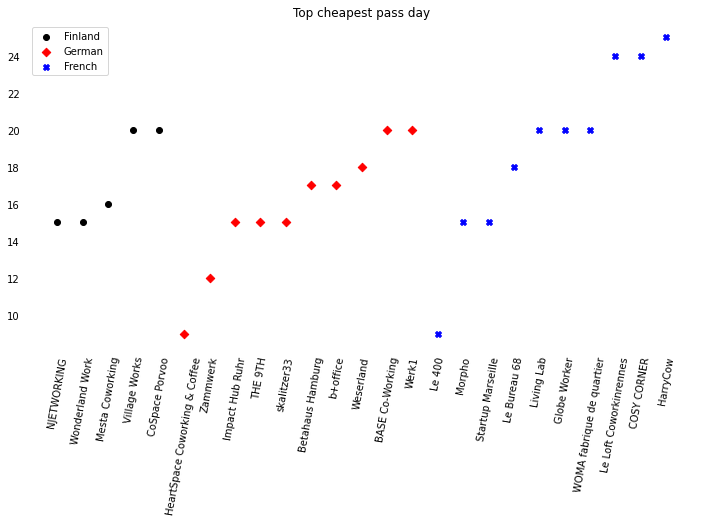

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(12,6))
plt.scatter(Finnish_top_5_day.Name, Finnish_top_5_day.Price, marker="o", color="black", label = "Finland")
plt.scatter(German_top_10_day.Name, German_top_10_day.Price, marker ="D", color="red", label = "German")
plt.scatter(French_top_10_day.Name, French_top_10_day.Price, marker ="X", color="blue", label = "French")
plt.xticks(rotation=80)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.title("Top cheapest pass day")
plt.legend()


## Top cheapest week pass

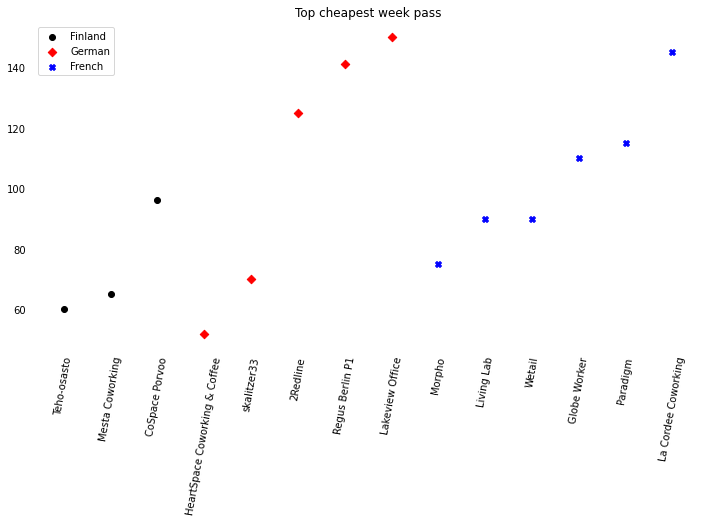

In [153]:
fig = plt.figure(figsize=(12,6))
plt.scatter(Finnish_top_week.Name, Finnish_top_week.Price, marker="o", color="black", label = "Finland")
plt.scatter(German_top_week.Name, German_top_week.Price, marker ="D", color="red", label = "German")
plt.scatter(French_top_week.Name, French_top_week.Price, marker ="X", color="blue", label = "French")
plt.xticks(rotation=80)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.title("Top cheapest week pass")
plt.legend()


## Top cheapest month pass

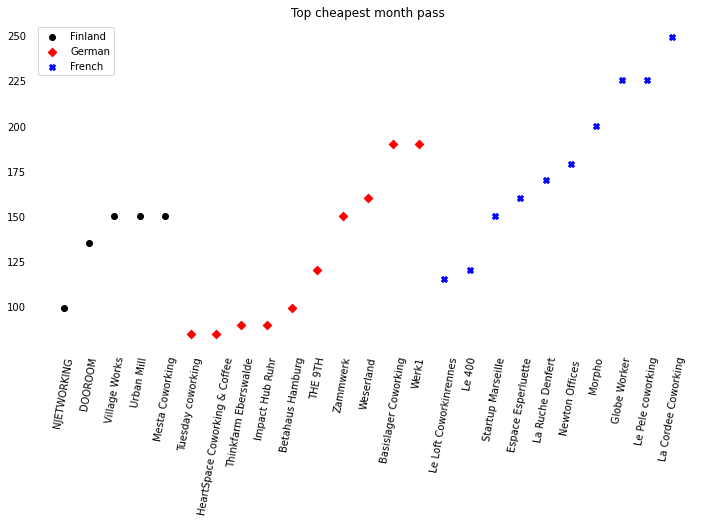

In [154]:
fig = plt.figure(figsize=(12,6))
plt.scatter(Finnish_top_5_month.Name, Finnish_top_5_month.Price, marker="o", color="black", label = "Finland")
plt.scatter(German_top_10_month.Name, German_top_10_month.Price, marker ="D", color="red", label = "German")
plt.scatter(French_top_10_month.Name, French_top_10_month.Price, marker ="X", color="blue", label = "French")
plt.xticks(rotation=80)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.title("Top cheapest month pass")
plt.legend()
